#**CLUSTERING**

##IRIS DATASET
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#import kmeans
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Iris Dataset Loading
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.size

750

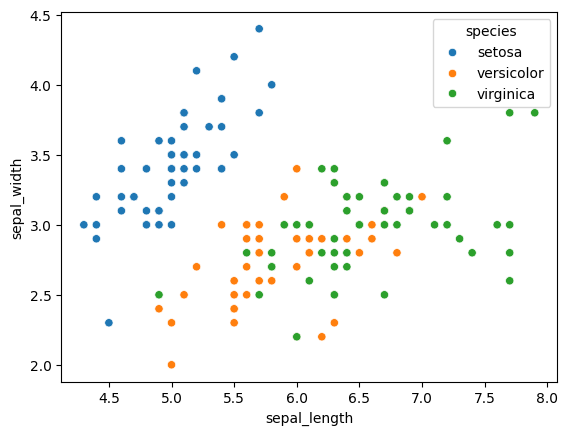

In [ ]:
# Visual representation of Iris Dataset using sepal lenght and sepal widht as variables
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

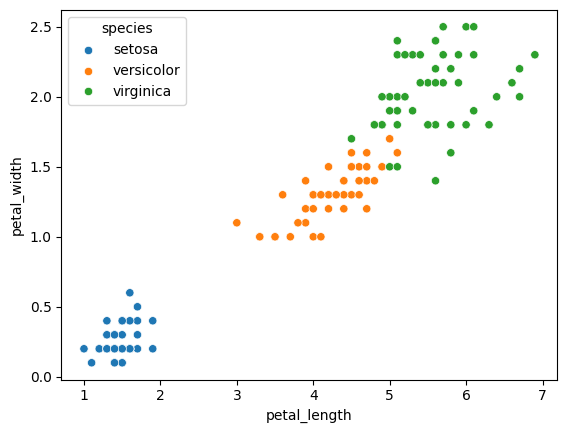

In [ ]:
# Visual representation of Iris Dataset using petal length and petal width as variables
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.show()

Petal length and petal width are more useful to classify our flowers and show them into distinct groups. It's evident that setosa species are much more separated from versicolor and virginica, which are closer together

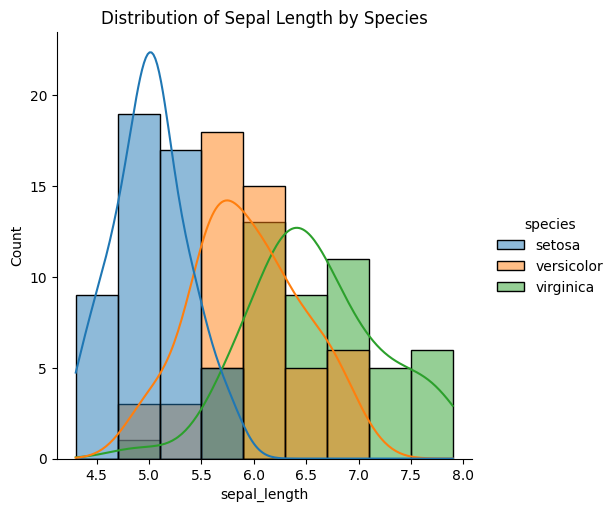

In [ ]:
# Lets' see the distributions of the 4 different variables by species

sns.displot(x='sepal_length', hue='species', data=iris, kde=True)
plt.title('Distribution of Sepal Length by Species')
plt.show()

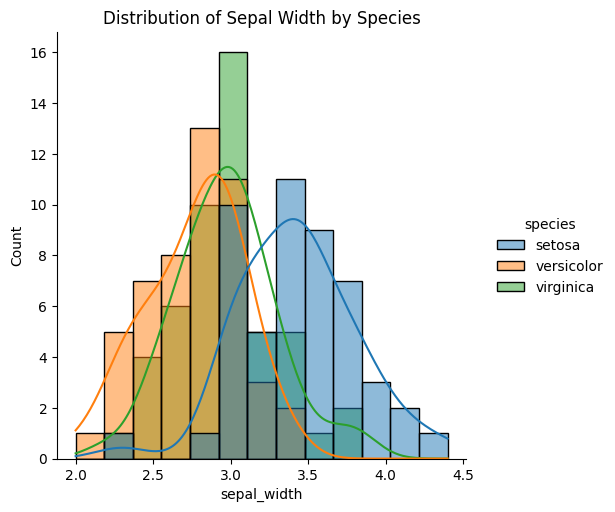

In [ ]:
# Lets' see the distributions of the 4 different variables by species

sns.displot(x='sepal_width', hue='species', data=iris, kde=True)
plt.title('Distribution of Sepal Width by Species')
plt.show()

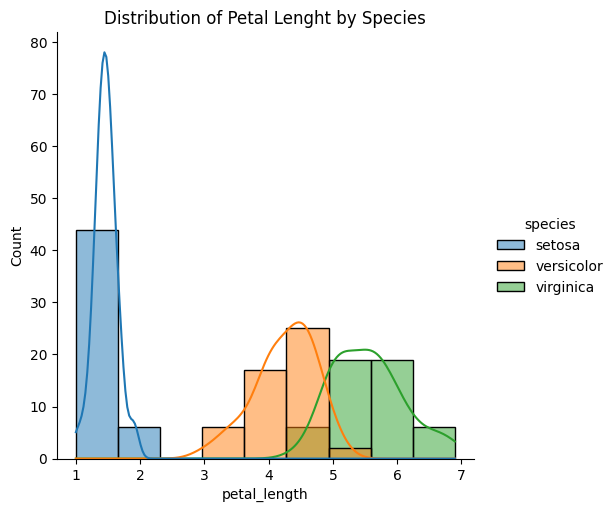

In [ ]:
# Lets' see the distributions of the 4 different variables by species

sns.displot(x='petal_length', hue='species', data=iris, kde=True)
plt.title('Distribution of Petal Lenght by Species')
plt.show()

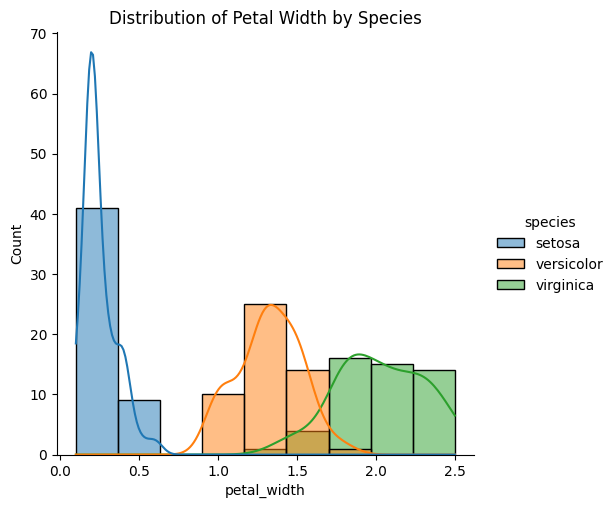

In [ ]:
# Lets' see the distributions of the 4 different variables by species

sns.displot(x='petal_width', hue='species', data=iris, kde=True)
plt.title('Distribution of Petal Width by Species')
plt.show()

### **Comments**
Observing the distribution, it is clear why petal are best predictors of the species and that it is easier to identify Setosa as a distinct class respect to the other 2.

In [ ]:
type(iris)

pandas.core.frame.DataFrame

In [ ]:
# Let's separate predictors and target variables
X=iris.drop('species', axis=1)
y=iris['species']

In [ ]:
# Let's create our KMeans clustering model fixing the hyperparameter n_clusters to 2
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(X)


KMeans(n_clusters=2)

In [ ]:
# get the labales
labels = kmeans_2.labels_

In [ ]:
# get the centroics
centroids = kmeans_2.cluster_centers_

In [ ]:
centroids

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

In [ ]:
kmeans_2_df = pd.DataFrame(X)

In [ ]:
kmeans_2_df['cluster'] = labels

In [ ]:
kmeans_2_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


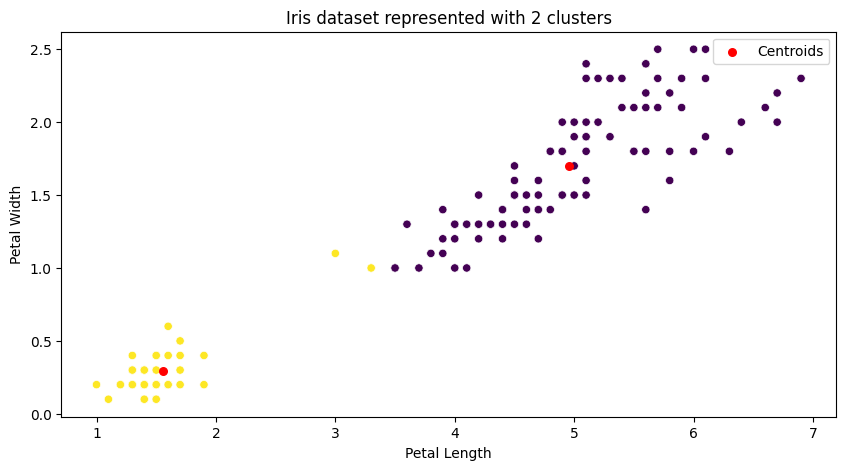

In [ ]:
# plotting the graph of the 2 clusters
plt.figure(figsize=(10,5))

# plotting data labeled with the clusters
sns.scatterplot(x="petal_length", y="petal_width", data=kmeans_2_df, c= labels)
plt.title("Iris dataset represented with 2 clusters")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plotting the centroids of the clusters
plt.scatter(kmeans_2.cluster_centers_[:, 2],
            kmeans_2.cluster_centers_[:, 3],
            s=30, c='red',
            label='Centroids')
plt.legend()
plt.show()

###**COMMENTS**
In this case, we see that the 2 clusters don't represent the real species of the flowers in the dataset. When we don't have any a priori knowledge, we can use the "ELBOW METHOD" to determine the ideal number of clusters.

## **Selecting the ideal number of clusters with the Elbow method**

If we don't have a priori knowledge of the number of clusters, we have to find a way to determine the "ideal" number of clusters.

The Elbow Method is a visual approach used to determine the ideal number of clusters in K-means clustering. It operates by calculating the Within-Cluster Sum of Squares (WCSS), which is the total of the squared distances between data points and their cluster center. However, there is a point where increasing K no longer leads to a significant decrease in WCSS, and the rate of decrease slows down.

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X=iris.drop('species', axis=1)
y=iris['species']

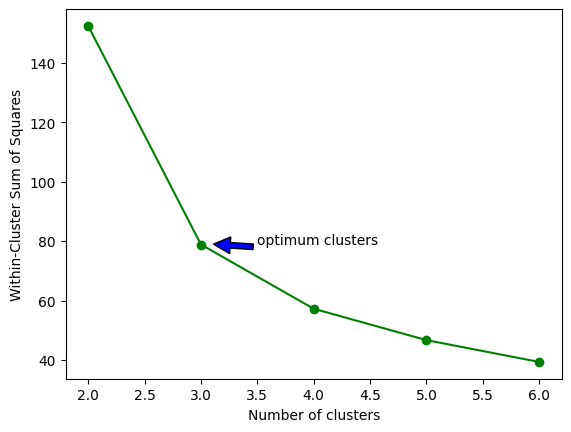

In [ ]:
# Empty list to store the values of the Within-Cluster Sum of Squares obtained for each number of clusters set
wccs = []

# using for loop to iterates
for i in range(2,7):

    #training k-means clustering in python on different clusters
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    wccs.append(kmeans.inertia_)

# ploting the elbow graph
plt.plot(range(2,7), wccs, 'og-')
plt.annotate('optimum clusters', xy=(3.1, 79), xytext=(3.5, 79), arrowprops=dict(facecolor='blue', shrink=0.03))

# labeling the data
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares")

plt.show()


## **Clustering with the optimal number of clusters: 3**

In [ ]:
# Let's create our KMeans clustering model fixing the hyperparameter n_clusters to 3
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)

KMeans(n_clusters=3)

In [ ]:
# get the labales
labels = kmeans_3.labels_

In [ ]:
# get the 3 centroics
centroids = kmeans_3.cluster_centers_

In [ ]:
kmeans_3_df = pd.DataFrame(X)

In [ ]:
kmeans_3_df['cluster'] = labels

In [ ]:
kmeans_3_df["species"] = iris["species"]

In [ ]:
kmeans_3_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
kmeans_3_df['cluster'].value_counts()

,count
cluster,
2,61
0,50
1,39


In [ ]:
kmeans_3_df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


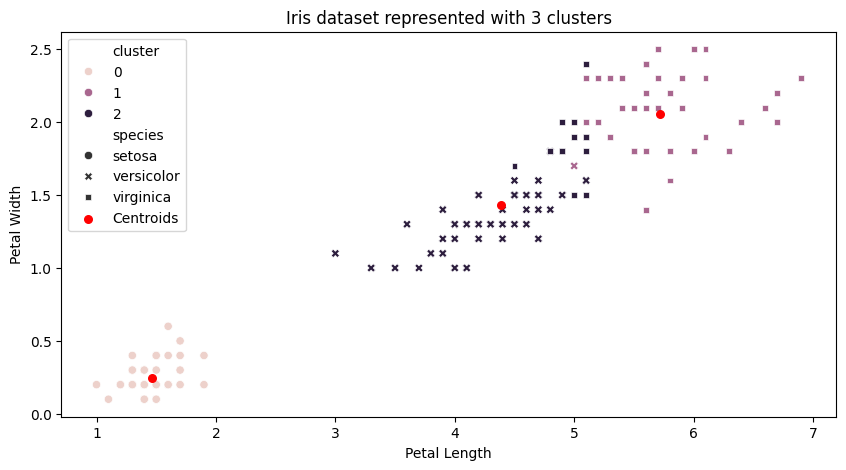

In [ ]:
# ploting the graph of 3 clusters
plt.figure(figsize=(10,5))

# plotting data labeled with the clusters
sns.scatterplot(x="petal_length", y="petal_width", data=kmeans_3_df, hue= "cluster", style="species")
plt.title("Iris dataset represented with 3 clusters")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 2],
            centroids[:, 3],
            s=30, c='red',
            label='Centroids')
plt.legend()
plt.show()

###**COMMENTS**
This representation is much closer to the "real" representation of data.